# 文本詞嵌入(Text embeddings) 測試
### 程式來源：[OpenAI Cookbook](https://platform.openai.com/docs/guides/embeddings)

## 載入套件

In [1]:
import openai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
embedding = openai.Embedding.create(
    input="Where are you going?", model="text-embedding-ada-002"
)
embedding

<OpenAIObject list at 0x29004bb79a0> JSON: {
  "data": [
    {
      "embedding": [
        0.007600937504321337,
        -0.009923617355525494,
        -0.006464176811277866,
        0.006064774002879858,
        -0.027995046228170395,
        0.018421674147248268,
        -0.03782649338245392,
        -0.009167824871838093,
        -0.007981906644999981,
        -0.018212756142020226,
        0.01597610116004944,
        0.016602857038378716,
        0.001924813026562333,
        -0.00763780577108264,
        0.018052995204925537,
        -0.017192743718624115,
        0.01714358665049076,
        -0.014255598187446594,
        -0.003920289687812328,
        -0.029690971598029137,
        0.0003272028698120266,
        -0.016578277572989464,
        0.017475398257374763,
        -0.01426788792014122,
        0.0007431191625073552,
        0.004027821123600006,
        0.0149192214012146,
        -0.01726648025214672,
        0.0008172390516847372,
        -0.02497187629342079,
      

In [6]:
len(embedding["data"])

1

In [8]:
embedding["data"][0]["embedding"]

[0.007600937504321337,
 -0.009923617355525494,
 -0.006464176811277866,
 0.006064774002879858,
 -0.027995046228170395,
 0.018421674147248268,
 -0.03782649338245392,
 -0.009167824871838093,
 -0.007981906644999981,
 -0.018212756142020226,
 0.01597610116004944,
 0.016602857038378716,
 0.001924813026562333,
 -0.00763780577108264,
 0.018052995204925537,
 -0.017192743718624115,
 0.01714358665049076,
 -0.014255598187446594,
 -0.003920289687812328,
 -0.029690971598029137,
 0.0003272028698120266,
 -0.016578277572989464,
 0.017475398257374763,
 -0.01426788792014122,
 0.0007431191625073552,
 0.004027821123600006,
 0.0149192214012146,
 -0.01726648025214672,
 0.0008172390516847372,
 -0.02497187629342079,
 0.03008422814309597,
 0.015533686615526676,
 -0.002192105632275343,
 -0.016074417158961296,
 -0.0010069552809000015,
 -0.01233232207596302,
 0.010095667093992233,
 -0.024431146681308746,
 0.01801612786948681,
 -0.011594963259994984,
 0.001291913678869605,
 0.003046212485060096,
 0.00100465107243508

In [9]:
len(embedding["data"][0]["embedding"])

1536

## 測試中文

In [10]:
embedding = openai.Embedding.create(
    input="開到一半火燒車,男駕駛急跳車求救", model="text-embedding-ada-002"
)
embedding["data"][0]["embedding"]

[-0.004056535195559263,
 -0.007128441706299782,
 0.014351299963891506,
 -0.02472362108528614,
 -0.02547895349562168,
 0.005894283764064312,
 -0.009050491265952587,
 0.002778541063889861,
 -0.015740569680929184,
 -0.004184671677649021,
 0.0021108819637447596,
 0.03612103685736656,
 -0.002139544114470482,
 0.009300020523369312,
 -0.005469409748911858,
 -0.010817427188158035,
 0.013312718831002712,
 0.011134396307170391,
 -0.0030719065107405186,
 -0.01779075711965561,
 -0.01315760612487793,
 -0.00323039130307734,
 0.015322440303862095,
 0.015754058957099915,
 0.007054257206618786,
 0.016414973884820938,
 0.00809958204627037,
 0.0004012699064332992,
 0.0036215451546013355,
 -0.012948540970683098,
 0.011377181857824326,
 1.1933775567740668e-05,
 -0.02274087630212307,
 -0.0012645060196518898,
 0.007688196375966072,
 0.02819005399942398,
 0.00046154469600878656,
 0.021351605653762817,
 0.009367460384964943,
 -0.017601924017071724,
 0.01928793080151081,
 -0.0243594441562891,
 0.000508752884343

In [11]:
len(embedding["data"][0]["embedding"])

1536

## 比較中、英文相似性

In [12]:
embedding1 = openai.Embedding.create(
    input="Where are you going?", model="text-embedding-ada-002"
)
embedding2 = openai.Embedding.create(
    input="你要去哪裡?", model="text-embedding-ada-002"
)
np.allclose(embedding1["data"][0]["embedding"], embedding2["data"][0]["embedding"])

False

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(np.row_stack((embedding1["data"][0]["embedding"], 
                                embedding2["data"][0]["embedding"])))

array([[1.        , 0.86715547],
       [0.86715547, 1.        ]])

## 比較肯定句與否定句的相似性

In [2]:
embedding1 = openai.Embedding.create(
    input="I do like this movie.", model="text-embedding-ada-002"
)
embedding2 = openai.Embedding.create(
    input="I do not like this movie.", model="text-embedding-ada-002"
)
np.allclose(embedding1["data"][0]["embedding"], embedding2["data"][0]["embedding"])

False

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(np.row_stack((embedding1["data"][0]["embedding"], 
                                embedding2["data"][0]["embedding"])))

array([[1.       , 0.9031476],
       [0.9031476, 1.       ]])

## 取得測試資料集

In [5]:
input_datapath = "data/fine_food_reviews_1k.csv"  
df = pd.read_csv(input_datapath)
df = df[["Time", "ProductId", "UserId", "Score", "Summary", "Text"]]
df = df.dropna()

# 將標題及內文合併為新欄位 combined
df["combined"] = (
    "Title: " + df.Summary.str.strip() + "; Content: " + df.Text.str.strip()
)

df.head()

,Time,ProductId,UserId,Score,Summary,Text,combined
0,1351123200,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...
1,1351123200,B003JK537S,A3JBPC3WFUT5ZP,1,Arrived in pieces,"Not pleased at all. When I opened the box, mos...",Title: Arrived in pieces; Content: Not pleased...
2,1351123200,B000JMBE7M,AQX1N6A51QOKG,4,"It isn't blanc mange, but isn't bad . . .",I'm not sure that custard is really custard wi...,"Title: It isn't blanc mange, but isn't bad . ...."
3,1351123200,B004AHGBX4,A2UY46X0OSNVUQ,3,These also have SALT and it's not sea salt.,I like the fact that you can see what you're g...,Title: These also have SALT and it's not sea s...
4,1351123200,B001BORBHO,A1AFOYZ9HSM2CZ,5,Happy with the product,My dog was suffering with itchy skin. He had ...,Title: Happy with the product; Content: My dog...


## 轉換為詞向量

In [3]:
# 定義轉換為詞向量的函數
def get_embedding(text, model="text-embedding-ada-002"):
    text = text.replace("\n", " ")
    return openai.Embedding.create(input = [text], model=model)['data'][0]['embedding']
 
# 將combined欄位轉換為詞向量
df['embedding'] = df.combined.apply(lambda x: get_embedding(x, model='text-embedding-ada-002'))

# 存檔
df.to_csv('data/fine_food_reviews_with_embeddings_1k.csv', index=False)

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-8b5wOBmK82BeorSFOMxwOTtc/user-plUWnt8WnVXuiz1Dp90n2CVi/img-lH4pecrkb7dK96sCQKaYjP8l.png?st=2023-03-08T06%3A07%3A31Z&se=2023-03-08T08%3A07%3A31Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-03-07T21%3A42%3A17Z&ske=2023-03-08T21%3A42%3A17Z&sks=b&skv=2021-08-06&sig=lUWa4G9xO/I3agyXu%2BHhtlNddB%2BiSTKBdKssx/iLhrg%3D'

## 讀取詞向量檔案

In [21]:
datafile_path = "data/fine_food_reviews_with_embeddings_1k.csv"
df = pd.read_csv(datafile_path)
df.head()

,Unnamed: 0,ProductId,UserId,Score,Summary,Text,combined,n_tokens,embedding
0,0,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...,52,"[0.007018072064965963, -0.02731654793024063, 0..."
1,297,B003VXHGPK,A21VWSCGW7UUAR,4,"Good, but not Wolfgang Puck good","Honestly, I have to admit that I expected a li...","Title: Good, but not Wolfgang Puck good; Conte...",178,"[-0.003140551969408989, -0.009995664469897747,..."
2,296,B008JKTTUA,A34XBAIFT02B60,1,Should advertise coconut as an ingredient more...,"First, these should be called Mac - Coconut ba...",Title: Should advertise coconut as an ingredie...,78,"[-0.01757248118519783, -8.266511576948687e-05,..."
3,295,B000LKTTTW,A14MQ40CCU8B13,5,Best tomato soup,I have a hard time finding packaged food of an...,Title: Best tomato soup; Content: I have a har...,111,"[-0.0013932279543951154, -0.011112828738987446..."
4,294,B001D09KAM,A34XBAIFT02B60,1,Should advertise coconut as an ingredient more...,"First, these should be called Mac - Coconut ba...",Title: Should advertise coconut as an ingredie...,78,"[-0.01757248118519783, -8.266511576948687e-05,..."


In [22]:
df.shape

(1000, 9)

## 將詞向量欄位由字串轉換為陣列

In [23]:
df["embedding"] = df.embedding.apply(eval).apply(np.array)  
type(df['embedding'][0])

numpy.ndarray

## 分類(Classification)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(
    list(df.embedding.values), df.Score, test_size=0.2, random_state=42
)

# 使用隨機森林(random forest)演算法
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

# 顯示效能衡量指標
report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

           1       0.75      0.30      0.43        20
           2       0.75      0.38      0.50         8
           3       1.00      0.18      0.31        11
           4       0.88      0.26      0.40        27
           5       0.75      1.00      0.86       134

    accuracy                           0.76       200
   macro avg       0.83      0.42      0.50       200
weighted avg       0.78      0.76      0.71       200



## 繪製 Precision recall curve

RandomForestClassifier() - Average precision score over all classes: 0.88


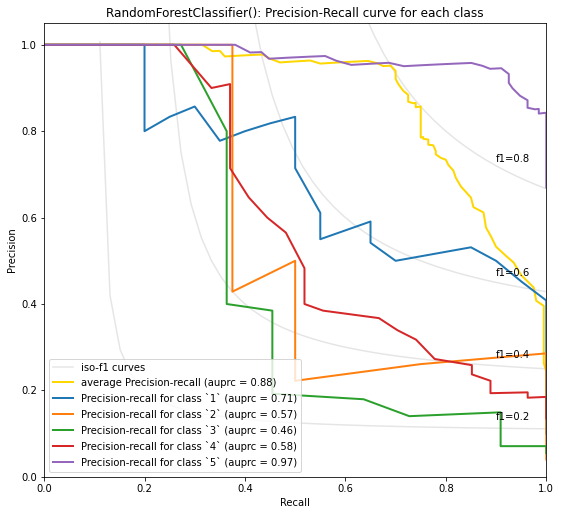

In [27]:
from openai.embeddings_utils import plot_multiclass_precision_recall

plot_multiclass_precision_recall(probas, y_test, [1, 2, 3, 4, 5], clf)

## 迴歸(Regression)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

clf = RandomForestRegressor(n_estimators=50)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)

print(f"mse={mse:.2f}, mae={mae:.2f}")

mse=0.62, mae=0.53


In [29]:
bmse = mean_squared_error(y_test, np.repeat(y_test.mean(), len(y_test)))
bmae = mean_absolute_error(y_test, np.repeat(y_test.mean(), len(y_test)))
print(f"以平均數預測: mse={bmse:.2f}, mae={bmae:.2f}")

以平均數預測: mse=1.73, mae=1.03


In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.643680825540894

### 結論：詞向量模型比以平均數預測的模型好上一倍。

## 集群(Clustering)

In [31]:
# 將embedding欄位所有列合併為陣列
matrix = df['embedding'].values 
matrix = np.stack(matrix)

## KMeans

In [34]:
df['Score'].value_counts()

5    651
4    138
1     87
3     75
2     49
Name: Score, dtype: int64

In [38]:
from sklearn.cluster import KMeans

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init='auto', 
                random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
df["Cluster"] = labels

df.groupby("Cluster").Score.mean().sort_values()

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Cluster
4    4.100671
0    4.157143
1    4.191176
2    4.222222
3    4.348361
Name: Score, dtype: float64

## 以TSNE萃取2個特徵

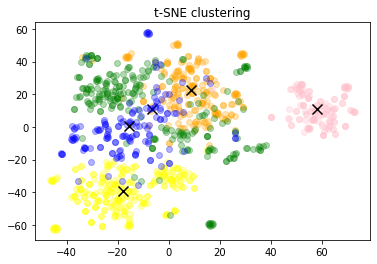

In [45]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", 
            learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["orange", "pink", "yellow", "green", "blue"]):
    xs = np.array(x)[df.Cluster == category]
    ys = np.array(y)[df.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color='black', s=100)
plt.title("t-SNE clustering");

## 將同一群的的標題/內文合併，抽出五筆評論，詢問ChatGPT評論的風格

In [27]:
# 抽樣筆數
rev_per_cluster = 5

for i in range(n_clusters):
    print(f"Cluster {i} Theme:", end=" ")

    # 合併標題、內文，抽出五筆評論
    reviews = "\n".join(
        df[df.Cluster == i]
        .combined.str.replace("Title: ", "")
        .str.replace("\n\nContent: ", ":  ")
        .sample(rev_per_cluster, random_state=42)
        .values
    )
    
    # 詢問ChatGPT評論的風格
    prompt=f'What do the following customer reviews have in common?\n\n' + \
           f'Customer reviews:\n"""\n{reviews}\n"""\n\nTheme:'
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=prompt,
        temperature=0,
        max_tokens=64,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
    )
    print(response["choices"][0]["text"].replace("\n", ""))

    # 顯示
    sample_cluster_rows = df[df.Cluster == i].sample(rev_per_cluster, random_state=42)
    for j in range(rev_per_cluster):
        print(sample_cluster_rows.Score.values[j], end=", ")
        print(sample_cluster_rows.Summary.values[j], end=":   ")
        print(sample_cluster_rows.Text.str[:70].values[j])
    print("-" * 100)

Cluster 0 Theme:  All of the reviews are positive and the customers are satisfied with the product they purchased.
5, Loved these gluten free healthy bars, saved $$ ordering on Amazon:   These Kind Bars are so good and healthy & gluten free.  My daughter ca
1, Should advertise coconut as an ingredient more prominently:   First, these should be called Mac - Coconut bars, as Coconut is the #2
5, very good!!:   just like the runts<br />great flavor, def worth getting<br />I even o
5, Excellent product:   After scouring every store in town for orange peels and not finding an
5, delicious:   Gummi Frogs have been my favourite candy that I have ever tried. of co
----------------------------------------------------------------------------------------------------
Cluster 1 Theme:  All of the reviews are about pet food.
2, Messy and apparently undelicious:   My cat is not a huge fan. Sure, she'll lap up the gravy, but leaves th
4, The cats like it:   My 7 cats like this food but it is a little 